In [2]:
from dipy.data import fetch_sherbrooke_3shell
fetch_sherbrooke_3shell()

  0%|          | 0/11750 [00:00<?, ? MB/s]

  0%|          | 0/1 [00:00<?, ? MB/s]

  0%|          | 0/1 [00:00<?, ? MB/s]

({'HARDI193.nii.gz': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.nii.gz',
   '0b735e8f16695a37bfbd66aab136eb66'),
  'HARDI193.bval': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.bval',
   'e9b9bb56252503ea49d31fb30a0ac637'),
  'HARDI193.bvec': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.bvec',
   '0c83f7e8b917cd677ad58a078658ebb7')},
 '/home/quizhpilema.134643/.dipy/sherbrooke_3shell')

In [3]:
from os.path import expanduser, join
home = expanduser('~')

In [4]:
dname = join(home, '.dipy', 'sherbrooke_3shell')

In [5]:
fdwi = join(dname, 'HARDI193.nii.gz')

print(fdwi)

fbval = join(dname, 'HARDI193.bval')

print(fbval)

fbvec = join(dname, 'HARDI193.bvec')

print(fbvec)

/home/quizhpilema.134643/.dipy/sherbrooke_3shell/HARDI193.nii.gz
/home/quizhpilema.134643/.dipy/sherbrooke_3shell/HARDI193.bval
/home/quizhpilema.134643/.dipy/sherbrooke_3shell/HARDI193.bvec


In [6]:
from dipy.io.image import load_nifti
data, affine, img = load_nifti(fdwi, return_img=True)

In [7]:
print(data.shape)

(128, 128, 60, 193)


In [9]:
print(img.header.get_zooms()[:3])

(2.0, 2.0, 2.0)


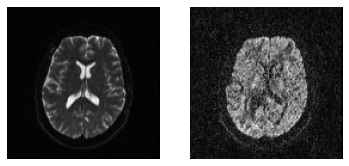

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt

axial_middle = data.shape[2] // 2
plt.figure('Showing the datasets')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', origin='lower')
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(data[:, :, axial_middle, 10].T, cmap='gray', origin='lower')
plt.show()
plt.savefig('data.png', bbox_inches='tight')

In [11]:
from dipy.io import read_bvals_bvecs
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

In [13]:
from dipy.core.gradients import gradient_table
gtab = gradient_table(bvals, bvecs)

In [14]:
print(gtab.info)

B-values shape (193,)
         min 0.000000
         max 3500.000000
B-vectors shape (193, 3)
          min -0.964050
          max 0.999992

None


In [15]:
print(gtab.bvals)

[   0. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 35

In [16]:
print(gtab.bvecs[:10, :])

[[ 0.          0.          0.        ]
 [ 0.999979   -0.00504001 -0.00402795]
 [ 0.          0.999992   -0.00398794]
 [-0.0257055   0.653861   -0.756178  ]
 [ 0.589518   -0.769236   -0.246462  ]
 [-0.235785   -0.529095   -0.815147  ]
 [-0.893578   -0.263559   -0.363394  ]
 [ 0.79784     0.133726   -0.587851  ]
 [ 0.232937    0.931884   -0.278087  ]
 [ 0.93672     0.144139   -0.31903   ]]


In [17]:
S0s = data[:, :, :, gtab.b0s_mask]

In [18]:
print(S0s.shape)

(128, 128, 60, 1)


In [1]:
from dipy.io.image import save_nifti
save_nifti('HARDI193_S0.nii.gz', S0s, affine)

NameError: name 'S0s' is not defined

In [2]:
from os.path import expanduser, join
opt_dir = expanduser('/opt')

In [3]:
dname = join(opt_dir, 'dora', 'Dora','ELA','C-001','DTI_64_p2s3_kurtosis_b1000_2000','DTI_64_p2s3_kurtosis_b1000_2000')

In [5]:
fdwi_img = join(dname, 'DTI_64_p2s3_kurtosis_b1000_2000_DTI_64_p2s3_kurtosis_b1000_2000_20200217175212_8.nii')
print(fdwi_img)
fbval_img = join(dname, 'DTI_64_p2s3_kurtosis_b1000_2000_DTI_64_p2s3_kurtosis_b1000_2000_20200217175212_8.bval')
print(fbval_img)
fbvec_img = join(dname, 'DTI_64_p2s3_kurtosis_b1000_2000_DTI_64_p2s3_kurtosis_b1000_2000_20200217175212_8.bvec')
print(fbvec_img)

/opt/dora/Dora/ELA/C-001/DTI_64_p2s3_kurtosis_b1000_2000/DTI_64_p2s3_kurtosis_b1000_2000/DTI_64_p2s3_kurtosis_b1000_2000_DTI_64_p2s3_kurtosis_b1000_2000_20200217175212_8.nii
/opt/dora/Dora/ELA/C-001/DTI_64_p2s3_kurtosis_b1000_2000/DTI_64_p2s3_kurtosis_b1000_2000/DTI_64_p2s3_kurtosis_b1000_2000_DTI_64_p2s3_kurtosis_b1000_2000_20200217175212_8.bval
/opt/dora/Dora/ELA/C-001/DTI_64_p2s3_kurtosis_b1000_2000/DTI_64_p2s3_kurtosis_b1000_2000/DTI_64_p2s3_kurtosis_b1000_2000_DTI_64_p2s3_kurtosis_b1000_2000_20200217175212_8.bvec


In [6]:
from dipy.io.image import load_nifti
data, affine, img = load_nifti(fdwi_img, return_img=True)

In [7]:
print(data.shape)
print(img.header.get_zooms()[:3])

(100, 100, 66, 140)
(2.0, 2.0, 2.0)


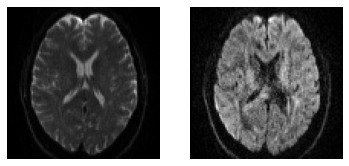

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

axial_middle = data.shape[2] // 2
plt.figure('Showing the datasets')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', origin='lower')
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(data[:, :, axial_middle, 10].T, cmap='gray', origin='lower')
plt.show()
plt.savefig('data.png', bbox_inches='tight')

In [9]:
from dipy.io import read_bvals_bvecs
bvals, bvecs = read_bvals_bvecs(fbval_img, fbvec_img)

In [10]:
from dipy.core.gradients import gradient_table
gtab = gradient_table(bvals, bvecs)

In [11]:
print(gtab.info)

B-values shape (140,)
         min 0.000000
         max 2000.000000
B-vectors shape (140, 3)
          min -0.999775
          max 0.997102

None


In [12]:
print(gtab.bvals)

[   0. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]


In [13]:
print(gtab.bvecs[:10, :])

[[ 0.          0.          0.        ]
 [-0.999758    0.00746045 -0.0207101 ]
 [ 0.0115076   0.9665     -0.256408  ]
 [-0.00786745  0.434674   -0.900554  ]
 [-0.586154    0.809384    0.0363433 ]
 [ 0.230978    0.71427     0.660657  ]
 [ 0.891707    0.337442    0.301649  ]
 [-0.807888    0.0305908   0.588542  ]
 [ 0.248184    0.824512   -0.508513  ]
 [ 0.940283    0.0464159  -0.337215  ]]


In [14]:
S0s = data[:, :, :, gtab.b0s_mask]
print(S0s.shape)

(100, 100, 66, 12)


In [15]:
from dipy.io.image import save_nifti
save_nifti('C001_S0.nii.gz', S0s, affine)

In [16]:
import numpy as np
from dipy.io.image import load_nifti, save_nifti
from dipy.io.gradients import read_bvals_bvecs
from dipy.core.gradients import gradient_table
import dipy.reconst.dti as dti
from dipy.data import get_fnames

In [17]:
print('data.shape (%d, %d, %d, %d)' % data.shape)

data.shape (100, 100, 66, 140)


In [18]:
from dipy.segment.mask import median_otsu

maskdata, mask = median_otsu(data, vol_idx=range(10, 50), median_radius=3,
                             numpass=1, autocrop=True, dilate=2)
print('maskdata.shape (%d, %d, %d, %d)' % maskdata.shape)

maskdata.shape (75, 96, 63, 140)


In [19]:
tenmodel = dti.TensorModel(gtab)

In [20]:
tenfit = tenmodel.fit(maskdata)

In [21]:
print('Computing anisotropy measures (FA, MD, RGB)')
from dipy.reconst.dti import fractional_anisotropy, color_fa

FA = fractional_anisotropy(tenfit.evals)

Computing anisotropy measures (FA, MD, RGB)


In [22]:
FA[np.isnan(FA)] = 0
save_nifti('tensor_fa.nii.gz', FA.astype(np.float32), affine)
save_nifti('tensor_evecs.nii.gz', tenfit.evecs.astype(np.float32), affine)

In [23]:
MD1 = dti.mean_diffusivity(tenfit.evals)
save_nifti('tensors_md.nii.gz', MD1.astype(np.float32), affine)
MD2 = tenfit.md

In [24]:
print('Computing tensor ellipsoids in a part of the splenium of the CC')

from dipy.data import get_sphere
sphere = get_sphere('repulsion724')

from dipy.viz import window, actor

# Enables/disables interactive visualization
interactive = False

scene = window.Scene()

evals = tenfit.evals[13:43, 44:74, 28:29]
evecs = tenfit.evecs[13:43, 44:74, 28:29]

Computing tensor ellipsoids in a part of the splenium of the CC
